# What is Principle Component Analysis ?

<p style = "font-size: 16px">A technique for reducing the dimensionality of such a dataset by transforming the orignial features which has higher dimensions into new features which has lower dimensions.</p>

* A principal component analysis is used as a dimension reduction technique to determine the principal components of a data set.


In [38]:
#import the most important libraires 

import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt 

In [3]:
#import the data 
df = pd.read_csv("world_happiness_data19.csv")

In [4]:
#Explore the top five rows of the dataset 
df.head()

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
#Explore the last five rows of the dataset
df.tail()

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [6]:
#Expllore the dimention of the dateset --> (# of training examples, # of features)
df.shape

(156, 9)

In [7]:
#Explore the data types in the data set
df.dtypes

overall_rank                      int64
country_or_region                object
score                           float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

In [8]:
#Remove the un-needed features --> overall_rank, country_or_region and score
df = df.drop(['overall_rank','score','country_or_region'],axis = 1)

In [9]:
#Explore the missing data-values 
df.isnull().sum()

gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [10]:
#Explore the the dataset after removing some features
df.head()

,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298


In [11]:
#Convert the data into numpy array so we can feed it to our model 
X = df.values

In [16]:
#Explore the design matrix
X

array([[1.34 , 1.587, 0.986, 0.596, 0.153, 0.393],
       [1.383, 1.573, 0.996, 0.592, 0.252, 0.41 ],
       [1.488, 1.582, 1.028, 0.603, 0.271, 0.341],
       [1.38 , 1.624, 1.026, 0.591, 0.354, 0.118],
       [1.396, 1.522, 0.999, 0.557, 0.322, 0.298],
       [1.452, 1.526, 1.052, 0.572, 0.263, 0.343],
       [1.387, 1.487, 1.009, 0.574, 0.267, 0.373],
       [1.303, 1.557, 1.026, 0.585, 0.33 , 0.38 ],
       [1.365, 1.505, 1.039, 0.584, 0.285, 0.308],
       [1.376, 1.475, 1.016, 0.532, 0.244, 0.226],
       [1.372, 1.548, 1.036, 0.557, 0.332, 0.29 ],
       [1.034, 1.441, 0.963, 0.558, 0.144, 0.093],
       [1.276, 1.455, 1.029, 0.371, 0.261, 0.082],
       [1.609, 1.479, 1.012, 0.526, 0.194, 0.316],
       [1.333, 1.538, 0.996, 0.45 , 0.348, 0.278],
       [1.499, 1.553, 0.999, 0.516, 0.298, 0.31 ],
       [1.373, 1.454, 0.987, 0.495, 0.261, 0.265],
       [1.356, 1.504, 0.986, 0.473, 0.16 , 0.21 ],
       [1.433, 1.457, 0.874, 0.454, 0.28 , 0.128],
       [1.269, 1.487, 0.92 , 0.

# Define some helper functions
<br>
<dl>
   <dt>featureNormalize()</dt>
  <dd>For feature scalling </dd>
    <dt>pca()</dt>
  <dd>For Applying Principal Component Analysis technique on the data</dd>
  <dt>projectData()</dt>
  <dd>For projecting the training examples onto the principle components</dd>
    <dt>recoverData()</dt>
    <dd>For gettiog the original training examples with their original dimensions </dd>

</dl>


<p style = "font-size: 16px"><strong>Implementing Principal Component Analysis Algorithm consists of two parts:</strong></p>

* First, computing the covariance matrix of the data 
* Second, computing the the eigenvectors $U_{1}, U_{2},\ldots, U_{n}.$


<br>


## 1.featureNormalize()

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range. 

we use Z-score normalization to normalize the data which has the  formula:

\begin{align}
\large z=\frac{x - μ} {σ}
\end{align}

<strong>where ,</strong>

$\normalsize \mu:$ is the mean (average) 

$\normalsize\sigma:$ is the standard deviation from the mean

In [12]:
def featureNormalize(X):
    '''
    Usage:
      #featureNormalize--> used for normalizing features using Z-score normalization
  
    Arguments:
      #X --> The Design Matrix
    
    Returns:
      #The Normalized Matrix
      
    Notes:
      #X is a matrix where each column is a feature and each row is an example
      #So, you need to perform the normalization separately for each feature
    '''
    
    #Preallocating some variables to be used later 
    X_norm = np.copy(X)
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1,X.shape[1]))

    #compute the mean of the feature and subtract it from the dataset, storing the mean value in mu
    #Next, compute the standard deviation of each feature, storing the standard deviation in sigma.
    for i in range(X.shape[1]):
        mu[0, i] = mu[0, i] + np.mean(X_norm[:, i])
        sigma[0, i] = sigma[0, i] + np.std(X_norm[:, i])
        
    #Finally, compute the standard deviation of each feature and divide each feature by it's standard deviation, storing the result in x_norm
    for i in range(X.shape[1]):
        X_norm[:, i] = np.divide(np.subtract(X_norm[:, i], mu[0, i]), sigma[0, i])
        
    return X_norm, mu, sigma

## 2.pca()


You should check if the data need to normalize or not before computing the principle components of the dataset  to make the features in the same range.

Then, to compute the principle components, you should:
*  compute the n-by-n covariance matrix of the data, which is reprented by the capital Greek letter sigma 

\begin{equation}
\large \Sigma = \frac {1}{m} X^{T} X
\end{equation}



* After computing the covariance matrix, you should the principle the principle components of the data set by computing the Singular value-Decompostion

<strong>Singular value-Decompostion or SVD for short, </strong> is a matrix decomposition method for reducing a matrix to its constituent parts


In [26]:
def pca(X, key = False):
    
    '''
    Usage:
      #pca--> used for  applying Principal Component Analysis technique on the data 
              to compute the principle components of the dataset
  
    Arguments:
      #X --> The Design Matrix
      #key --> A boolean value which , if it is true, will map the design matrix to 
               featureNormalize() function to normalize it if it need to normalize.
               The  default value is flase
    
    Returns:
      #U --> the the left sigular vectors which contains the principle components
      #S --> which represents the singular values
    '''
    
    #if the key is true applay, normalize the data
    if key == True: 
        X = featureNormalize(X)
        
        
    #Define the number of the training examples and the number of features respectively
    m,n = X.shape
    
    
    #Pre-allocating empty array which contains the principle components 
    #U is called the left sigular vectors
    U  = np.zeros((n,n))
    
    #Pre-allocating empty array which contains the  a diagonal matrix 
    #S is called the singular values
    S = np.zeros((n,))
    
    #Preallocating V wich represents the right singular vectors 
    V = np.zeros((n,n))
    
    #Compute the covariance matrix of size (n,n)
    sigma = (1/m) * np.matmul(X.T,X)
    
    #Compute the sigular value decomposition
    U,S,V = np.linalg.svd(sigma)
    
    return U,S

## 3.projectData()

After computing the principle components, you should use them to reduce the  dimension of the data
by projecting the data onto the priciple components which represents the the new axes of the data.

<strong> The steps to project the data onto the K-principle components:</strong>

* Your are given the data set X, the principle components U, and the desired number of dimensions to reduce to K.
* Then , your project every training example onto the principle components analysis 
* In other words, you will represent the  value of each training example of the dataset relative to the principle components


### The Projected training exmples is defiend as: 

\begin{equation}
\large Z = X \hspace{1mm}U_{reduce} 
\end{equation}


<strong>where ,</strong>

$\normalsize U_{reduce}:$ is K-principle components which the training examples are projected onto them

$\normalsize X:$ is the design matrix




In [20]:
def projectData(X,U,K):   
    '''
    Usage:
      #projectData --> used to project the training examples onto the principle components
                       to reduce the dimension of the data
  
    Arguments:
      #X --> The Design Matrix
      #U --> the the left sigular vectors which contains the principle components
      #K --> the desired number of dimensions to reduce to K
    
    Returns:
    Z -->  the projected training examples
    '''
    
    #Pre-allocation Z which will contain the projected training examples
    Z = np.zeros((X.shape[0],K))
    
    #Pick the K-principle components,from the sigular vectors U = {U1,U2,....Un},
    #to project the training examples onto it 
    U_reduce = U[:,:K]
    
    #Compute the projected training examples 
    Z = np.matmul(X,U_reduce)
    
    return  Z

## 3.recoverData()

we can get the orginal data with the orginal dimension by projecting <strong>the projected data</strong> onto the the original high dimension space

<strong>The Approximate Reconstruction of X is defined as:</strong>

\begin{equation}
\large X_{rec} = Z \hspace{1mm} U_{reduce}^{T}
\end{equation}

In [48]:
def recoverData(Z,U,K):
    '''
    Usage:
      #recoverData --> used to get the original training examples
  
    Arguments:
      #X --> The Design Matrix
      #U --> the the left sigular vectors which contains the principle components
      #K --> the number of principle components
    
    Returns:
    X_rec -->  approximate reconstruction of X
    '''
    
    #Pre-allocating empty array to strore the approximate reconstruction of X of size(m,n)
    X_rec = np.zeros((Z.shape[0],U.shape[0]))
    
    #Get the K-principle components
    U_reduce = U[:,:K]
    
    #Get the approximate reconstruction of X 
    X_rec = np.matmul(Z,U_reduce.T)
    
    return X_rec

# Putting it together

In [27]:
#Get the n-principle components 
U,S = pca(X)

In [31]:
#Explore the n-principle components
U

array([[-0.53792925,  0.73957246,  0.01862739,  0.37940176, -0.08431654,
        -0.11073729],
       [-0.6869552 , -0.5366737 , -0.45366592,  0.12071645, -0.05257284,
         0.13009522],
       [-0.41977228,  0.14320977,  0.22344266, -0.86032591,  0.11485349,
        -0.00188981],
       [-0.2206289 , -0.29619013,  0.64220832,  0.30124338,  0.5668117 ,
        -0.19783754],
       [-0.09921778, -0.23823127,  0.40765697,  0.01215946, -0.77430952,
        -0.40928523],
       [-0.06320309, -0.00470681,  0.40656844,  0.10210652, -0.23686441,
         0.8741595 ]])

In [32]:
#Explore the size of the n-principle components
U.shape

(6, 6)

In [33]:
#Get the projected training exaples,Z, onto 2-principle components
Z = projectData(X,U,K = 2) 

In [35]:
#Explore the projected data
Z

array([[-2.39643252e+00,  6.57022910e-02],
       [-2.42415833e+00,  8.39692847e-02],
       [-2.50020725e+00,  1.53917326e-01],
       [-2.46161671e+00,  3.60474899e-02],
       [-2.38952050e+00,  1.15601342e-01],
       [-2.44494001e+00,  1.71861810e-01],
       [-2.36786737e+00,  1.36875345e-01],
       [-2.38702436e+00,  2.13190563e-02],
       [-2.38087530e+00,  1.08296795e-01],
       [-2.33580581e+00,  1.54793806e-01],
       [-2.41048916e+00,  8.68521905e-02],
       [-2.09363817e+00, -7.07349967e-02],
       [-2.23079503e+00,  1.37746221e-01],
       [-2.46161568e+00,  3.37659746e-01],
       [-2.34307123e+00,  8.55843360e-02],
       [-2.45555425e+00,  1.92945285e-01],
       [-2.30358092e+00,  1.66417690e-01],
       [-2.31001311e+00,  1.57704480e-01],
       [-2.27466381e+00,  2.01261546e-01],
       [-2.19799183e+00,  1.25749676e-01],
       [-2.22416521e+00,  2.86287989e-01],
       [-2.33401747e+00,  3.16680462e-02],
       [-1.95333821e+00,  5.84038028e-02],
       [-2.

In [36]:
#Explore the shape of the projected data 
Z.shape

(156, 2)

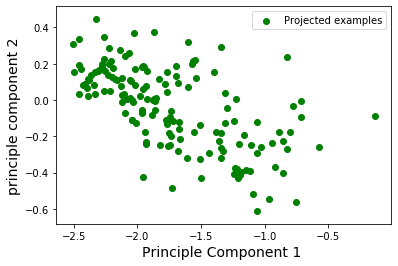

In [53]:
#Plot the projected training exaples 
plt.scatter(Z[:,0],Z[:,1],color = "g", label= "Projected examples")
plt.xlabel('Principle Component 1 ',fontsize = 14)
plt.ylabel('principle component 2', fontsize = 14)
plt.legend()
plt.show()

In [49]:
#recontruct the original data approximately
X_rec = recoverData(Z,U,K = 2)

In [51]:
#Explore the re-contructed data 
X_rec

array([[ 1.33770275,  1.61098109,  1.01536516,  0.5092619 ,  0.22211636,
         0.15115269],
       [ 1.36612704,  1.62022406,  1.0296197 ,  0.50996851,  0.22051549,
         0.15281907],
       [ 1.45876763,  1.63492698,  1.07156017,  0.50602918,  0.21139708,
         0.15729636],
       [ 1.35083536,  1.67167465,  1.03848082,  0.53242687,  0.23564849,
         0.15541211],
       [ 1.37088854,  1.57945332,  1.01960972,  0.4929573 ,  0.20954305,
         0.15048096],
       [ 1.44230901,  1.58733053,  1.05093034,  0.48852065,  0.20163865,
         0.15371884],
       [ 1.37497435,  1.5531614 ,  1.01356698,  0.48187884,  0.20232655,
         0.14901229],
       [ 1.29981721,  1.62833742,  1.00505977,  0.52033206,  0.23175638,
         0.15076697],
       [ 1.36083579,  1.57743462,  1.01493462,  0.49321345,  0.21042547,
         0.14996894],
       [ 1.3709795 ,  1.52152018,  1.00267453,  0.46949787,  0.19487673,
         0.14690156],
       [ 1.36090611,  1.60928677,  1.02429462,  0.

In [52]:
#Explore the shape of it 
X_rec.shape

(156, 6)

In [63]:
#Explore example from X
X[1]

array([1.383, 1.573, 0.996, 0.592, 0.252, 0.41 ])

In [64]:
#Explore the same examples from X_rec
X_rec[1]

array([1.36612704, 1.62022406, 1.0296197 , 0.50996851, 0.22051549,
       0.15281907])

## Note:

<p style = "font-size:18px"> we see example from the reconstruced and the original dataset, and we can observe that they are close to each other.</p>

# Congratulations!